## Реализовать бинарный классификатор изображений бабочек родов calias и aglais

*  metafile.csv - метафайл всех данных
*  metafile_colias.csv - только colias бабочки
*  metafile_aglais.csv - только aglais бабочки
*  metafile_train.csv - обучающий датасет (20%)
*  metafile_test.csv - тестовый датасет (80%)

Сами изображения хранятся так:
```
dataset_train/
  aglais/
  colias/
dataset_test/
  aglais/
  colias/
```

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

import os

import matplotlib.pyplot as plt


In [ ]:

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

train_dir = 'dataset_train'
test_dir = 'dataset_test'

image_size = (150, 150)
batch_size = 32
epochs = 10

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)


Found 1056 images belonging to 2 classes.
Found 4231 images belonging to 2 classes.


### Настраиваем и компилим модель

In [13]:
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

model = models.Sequential([
    layers.Input(shape=(150, 150, 3)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


### Обучаем модель на тренировочном датасете

In [7]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)


/home/v131v/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.5792 - loss: 1.0151

/home/v131v/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 23s 677ms/step - accuracy: 0.5809 - loss: 1.0075 - val_accuracy: 0.7420 - val_loss: 0.5158
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 22s 670ms/step - accuracy: 0.7673 - loss: 0.4850 - val_accuracy: 0.8748 - val_loss: 0.3734
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 23s 704ms/step - accuracy: 0.8562 - loss: 0.3754 - val_accuracy: 0.8722 - val_loss: 0.3035
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 23s 699ms/step - accuracy: 0.8541 - loss: 0.3500 - val_accuracy: 0.9171 - val_loss: 0.2304
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 23s 706ms/step - accuracy: 0.8891 - loss: 0.3100 - val_accuracy: 0.8987 - val_loss: 0.2459
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 22s 680ms/step - accuracy: 0.8684 - loss: 0.3047 - val_accuracy: 0.9231 - val_loss: 0.2075
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 23s 700ms/step - accuracy: 0.8877 - loss: 0.2653 - val_accuracy: 0.9160 - val_loss: 0.2143
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 22s 675ms/step - accuracy: 0.9167 - loss: 0.2377 - val_accuracy: 0.893

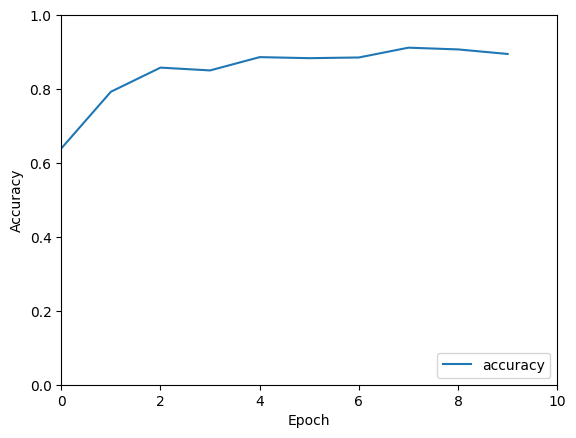

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xlim([0, epochs])
plt.legend(loc='lower right')
plt.show()


### Оценка точности

In [9]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Точность на тестовых данных: {test_acc}")


133/133 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.9022 - loss: 0.2376
Точность на тестовых данных: 0.9023871421813965


### Сохраняем модельку в keras формате

In [10]:
# Сохранение модели
model.save('butterfly_classifier.keras')
